In [1]:
import pandas as pd
import json

# charts and images
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image as pilimage
import base64, io
from IPython.display import Markdown as md

# Measuring changes in litter density before and after restoration 

In 2015 we began a project with a goal to reduce and prevent litter in the Lower American River,and one of its tributaries, Cordova Creek. One of the project objectives was to quantify the debris found there by performing weekly surveys. Regular reports were posted. After nine months, an average density of debris items for the project, based upon the daily total for each day surveyed, was 1.98 debris objects per foot(or 6.496 per meter), of creek bank. Surveys continued for another nine months in order to establish a baseline for future referrence. This repository provides background on our first project, its survey results, and the current project results.


## Background on cordova creek

The Cordova Creek Naturalization Project(started in early 2016), restored natural form and function to a portion of the channelized stream previously named the Clifton Drain. The naturalized waterway, which provides both critical habitat and water quality benefits, was renamed Cordova Creek. 



## History of Naturalization Project

The River Bend Park Area Plan calls for restoration of Cordova Creek to create a riparian corridor that will filter urban runoff and serve as a buffer between nature study area to the west and limited and developed recreational uses to the east. It also calls for bringing together native plant nursery, organic farming operation and riparian habitat to enhance interpretation opportunities. 

## Methods


Removal Survey Protocols
Listed below, are the sequence of steps required for safe, efficient removal and documentation of the pollutant debris.

1. Take pictures of location, including visible debris present
2. Note location, date, length of survey area
3. Remove all visible debris items from within the survey perimeter using standard retrieval methods/equipment
4. Place all debris items on a tarp
5. Count and photograph the array of items
6. Enter data in the survey app
7. Once all items have been documented dispose, or recycle 

    

")

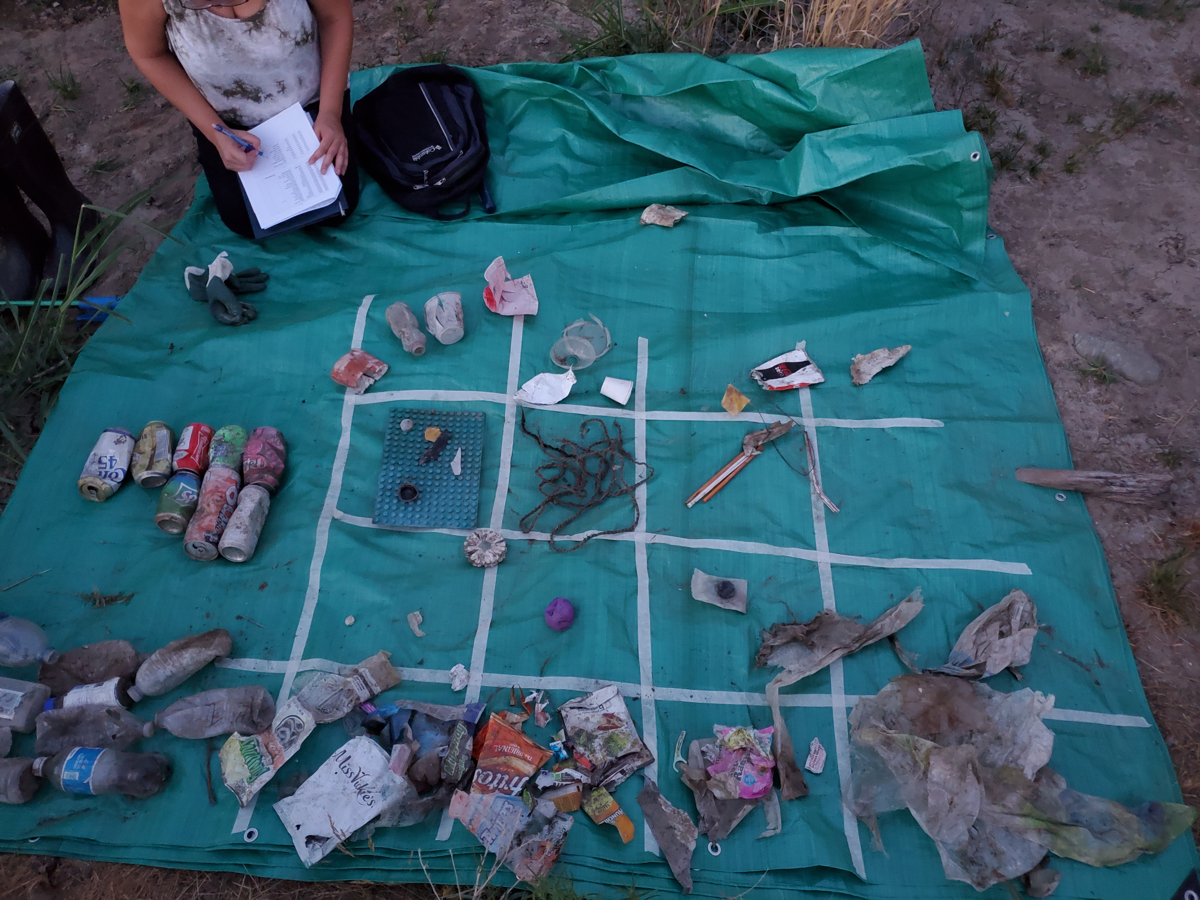

In [2]:
output = io.BytesIO()

this_image = pilimage.open("images/demotarp.jpg")
this_image.thumbnail((1600, 900))
this_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

In [ ]:
#hd personnel documenting trash objects using survey form.

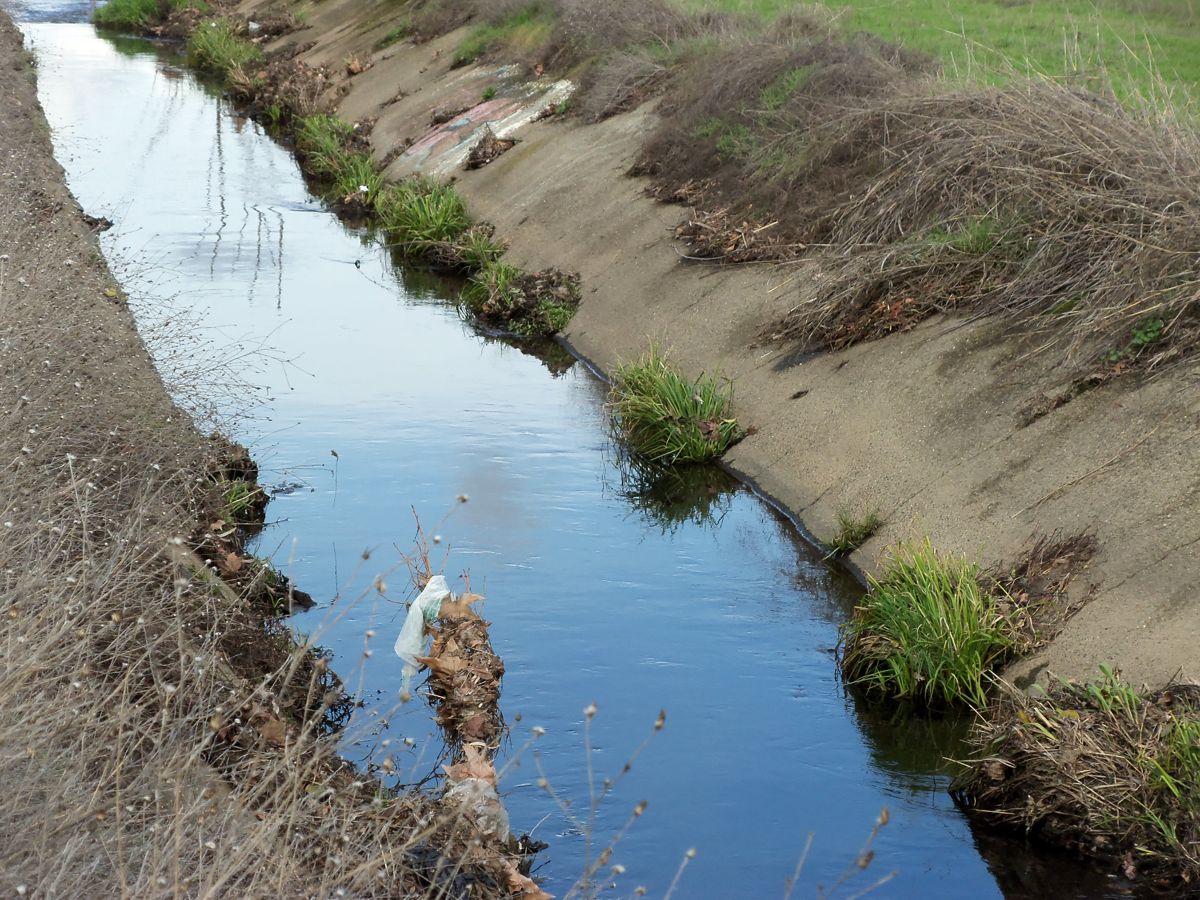

In [3]:

output = io.BytesIO()

this_image = pilimage.open("images/100_5208.JPG")
this_image.thumbnail((1600, 900))
this_image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

In [4]:
#The drainage ditch known as Clifton's Drain before restoration. 

In [5]:
# using the server data
server_data = pd.read_csv('resources/the_data.csv')

In [6]:
# drop unnamed column:
def drop_this_column(data, column='Unnamed: 0'):
    if column in data.columns:
        data.drop(column, inplace=True, axis=1)
for datas in [server_data]:
    drop_this_column(datas)

In [7]:
fd = server_data[server_data.location == 'cordova-creek'].copy()

In [8]:
# number of samples
fd.loc_date.nunique()

56

In [9]:
# total collected
fd.quantity.sum()

9212

In [10]:
# median pieces of trash per meter of shoreline (foot?)
x = fd.groupby('loc_date').pcs_m.sum()
x.median()

5.26

In [11]:
# the top 20 codes
codes = fd.groupby('code', as_index=False).agg({'pcs_m':'median', 'quantity':'sum'})
codes.sort_values(by='quantity', ascending=False)[:20]

code  pcs_m  quantity
61   G82   0.56      1488
42   G30   0.59      1245
39   G27   0.30       861
58   G79   0.30       537
15  G156   0.15       334
41    G3   0.15       312
37   G25   0.17       262
32   G21   0.11       225
13  G153   0.11       218
56    G7   0.11       217
47   G35   0.11       202
45   G33   0.11       196
23  G178   0.11       194
36   G24   0.15       188
22  G177   0.11       170
35   G23   0.11       144
44   G32   0.07       132
0    G10   0.07       130
29  G200   0.07       120
3   G124   0.11       115

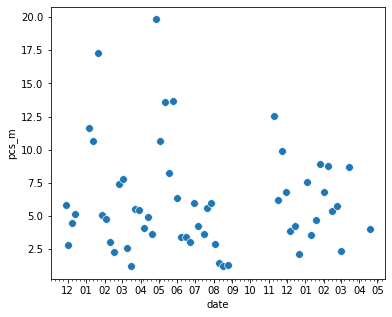

In [12]:
# time series


dt = fd.groupby(['loc_date', 'date'], as_index=False).pcs_m.sum()
dt['date'] = pd.to_datetime(dt['date'], format="%Y-%m-%d")

fig, ax = plt.subplots(figsize=(6,5))

sns.scatterplot(data=dt, x='date', y='pcs_m', ax=ax, s=60)
mnrs = mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
mjrs = mdates.MonthLocator(interval=1, tz=None)
ax.xaxis.set_minor_locator(mnrs)
ax.xaxis.set_major_locator(mjrs)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
